In [1]:
import pandas as pd

# Load the comments dataset
df_comments = pd.read_csv('carbon_credits_comments_new.csv')

# Display the first few rows of the dataset to ensure it loaded correctly
print(df_comments.head())

                                            Comments        Date
0  Honestly, I see these stories and I'm pretty m...  09/07/2022
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022
2                            What’s a carbon credit?  09/07/2022
3  Yet another example of how carbon credits are ...  09/07/2022
4   BP and exploitation. Name a more consistent duo.  09/07/2022


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound sentiment score for each comment
def get_sentiment(comment):
    sentiment_score = analyzer.polarity_scores(comment)
    return sentiment_score['compound']

# Apply the function to each comment and create a new 'Sentiment' column
df_comments['Sentiment'] = df_comments['Comments'].apply(get_sentiment)

# Display the updated dataframe
print(df_comments.head())

                                            Comments        Date  Sentiment
0  Honestly, I see these stories and I'm pretty m...  09/07/2022    -0.5682
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022     0.8126
2                            What’s a carbon credit?  09/07/2022     0.3818
3  Yet another example of how carbon credits are ...  09/07/2022    -0.2500
4   BP and exploitation. Name a more consistent duo.  09/07/2022     0.0000


In [3]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df_comments.isnull().sum())

# Drop rows with missing values (if any)
df_comments.dropna(inplace=True)

# Display the dataset after removing missing values
print("\nDataset after removing missing values:")
print(df_comments.head())

Missing values in each column:
Comments     0
Date         0
Sentiment    0
dtype: int64

Dataset after removing missing values:
                                            Comments        Date  Sentiment
0  Honestly, I see these stories and I'm pretty m...  09/07/2022    -0.5682
1  Fossil fuel industry loves the carbon credit. ...  09/07/2022     0.8126
2                            What’s a carbon credit?  09/07/2022     0.3818
3  Yet another example of how carbon credits are ...  09/07/2022    -0.2500
4   BP and exploitation. Name a more consistent duo.  09/07/2022     0.0000


In [4]:
# Aggregate sentiment scores by date (mean sentiment per day)
df_sentiment_aggregated = df_comments.groupby('Date').agg({'Sentiment': 'mean'}).reset_index()

# Display the aggregated sentiment scores by date
print(df_sentiment_aggregated.head(100))

          Date  Sentiment
0   01/02/2020   0.216267
1   01/03/2021   0.035678
2   01/03/2022  -0.003624
3   01/04/2023   0.950900
4   01/05/2020  -0.122200
..         ...        ...
95  06/01/2022   0.251408
96  06/01/2023   0.230267
97  06/02/2020   0.700300
98  06/02/2022   0.904100
99  06/04/2021   0.534260

[100 rows x 2 columns]


In [5]:
# Load the final merged data
final_data = pd.read_csv('final_merged_data.csv')

# Display the first few rows to ensure it's loaded correctly
print(final_data.head())

         Date    Low   High   Open  DailyChange  Price_MA_7  \
0  2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1  2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2  2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3  2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4  2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10.4                                  6.6  
1                              -10.4                                  6.6  
2                   

In [6]:
# Convert 'Date' column in df_comments to datetime format (assuming format like 'dd/mm/yyyy')
df_sentiment_aggregated['Date'] = pd.to_datetime(df_sentiment_aggregated['Date'], format="%d/%m/%Y", errors='coerce')

# Convert 'Date' column in final_data to datetime format (assuming format like 'yyyy-mm-dd')
final_data['Date'] = pd.to_datetime(final_data['Date'], format="%Y-%m-%d", errors='coerce')

# Display the updated data to ensure date conversion was successful
print(df_sentiment_aggregated.head())
print(final_data.head())

        Date  Sentiment
0 2020-02-01   0.216267
1 2021-03-01   0.035678
2 2022-03-01  -0.003624
3 2023-04-01   0.950900
4 2020-05-01  -0.122200
        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  
0                              -10

In [7]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(final_data, df_sentiment_aggregated[['Date', 'Sentiment']], on='Date', how='left')

# Display the merged dataset to ensure the merge was successful
print(merged_data.head())

        Date    Low   High   Open  DailyChange  Price_MA_7  \
0 2020-01-02  24.90  24.90  24.90    -2.352941   24.961429   
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
3 2020-01-07  24.59  24.85  24.59     1.869919   24.808571   
4 2020-01-08  24.57  24.88  24.88    -2.380952   24.852857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
0                               45.243                0.99   
1                               45.243                0.99   
2                               45.243                0.99   
3                               45.243                0.99   
4                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  \
0                              -10.4                                  6.6   
1                              -10.4                                  6.6   
2                      

In [8]:
# Drop rows with missing values in the 'Sentiment' column
merged_data.dropna(subset=['Sentiment'], inplace=True)

# Display the cleaned dataset to ensure missing values are handled
print(merged_data.head())
print(merged_data.tail(10))

        Date    Low   High   Open  DailyChange  Price_MA_7  \
1 2020-01-03  25.34  25.37  25.34     3.071948   24.927143   
2 2020-01-06  24.70  24.96  24.95    -1.276935   24.765714   
5 2020-01-09  24.84  25.20  24.84     1.900526   25.048571   
6 2020-01-10  24.71  24.82  24.82     0.283861   25.120000   
7 2020-01-13  24.55  24.73  24.55     1.189988   25.222857   

   Price_EUR(Quartly Crude Oil Prices)  Inflation_Rates(%)  \
1                               45.243                0.99   
2                               45.243                0.99   
5                               45.243                0.99   
6                               45.243                0.99   
7                               45.243                0.99   

   GDP_Growth_Rate(Annual Average %)  Unemployment_Rate(Annual Average %)  \
1                              -10.4                                  6.6   
2                              -10.4                                  6.6   
5                      

In [9]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


# Define features and target
features = ['Open', 'Low', 'High', 'DailyChange', 'Sentiment']
target = 'Price_MA_7'

X = merged_data[features].values
y = merged_data[target].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer with 128 neurons
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer (for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

C:\Users\gurde\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3262.1418 - mae: 52.5510 - val_loss: 5934.0400 - val_mae: 76.7386
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3266.6509 - mae: 52.5260 - val_loss: 5742.2314 - val_mae: 75.4958
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3173.0930 - mae: 51.2546 - val_loss: 5377.3848 - val_mae: 73.0737
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3114.3682 - mae: 50.7057 - val_loss: 4702.3159 - val_mae: 68.3593
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2409.7817 - mae: 43.3875 - val_loss: 3559.6919 - val_mae: 59.5143
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1620.0497 - mae: 34.0424 - val_loss: 1992.1420 - val_mae: 44.5267
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 911.4206 - mae: 26.3140 - val_loss: 522.5197 - val_mae: 22.2542
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 422.4164 - mae: 17.3600 - val_loss: 83.8176 - val_mae: 7.7287
Epoc

Epoch 54/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7361 - mae: 1.8056 - val_loss: 5.2105 - val_mae: 1.7229
Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7389 - mae: 1.8270 - val_loss: 5.4071 - val_mae: 1.7655
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2961 - mae: 1.7609 - val_loss: 5.1337 - val_mae: 1.7042
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0226 - mae: 1.5712 - val_loss: 5.0720 - val_mae: 1.7041
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3327 - mae: 1.8512 - val_loss: 5.2474 - val_mae: 1.7251
Epoch 59/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5830 - mae: 1.6470 - val_loss: 5.3112 - val_mae: 1.7456
Epoch 60/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0636 - mae: 1.6190 - val_loss: 5.5651 - val_mae: 1.8010
Epoch 61/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7951 - mae: 1.6350 - val_loss: 5.3017 - val_mae: 1.7501
Epoch 62/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

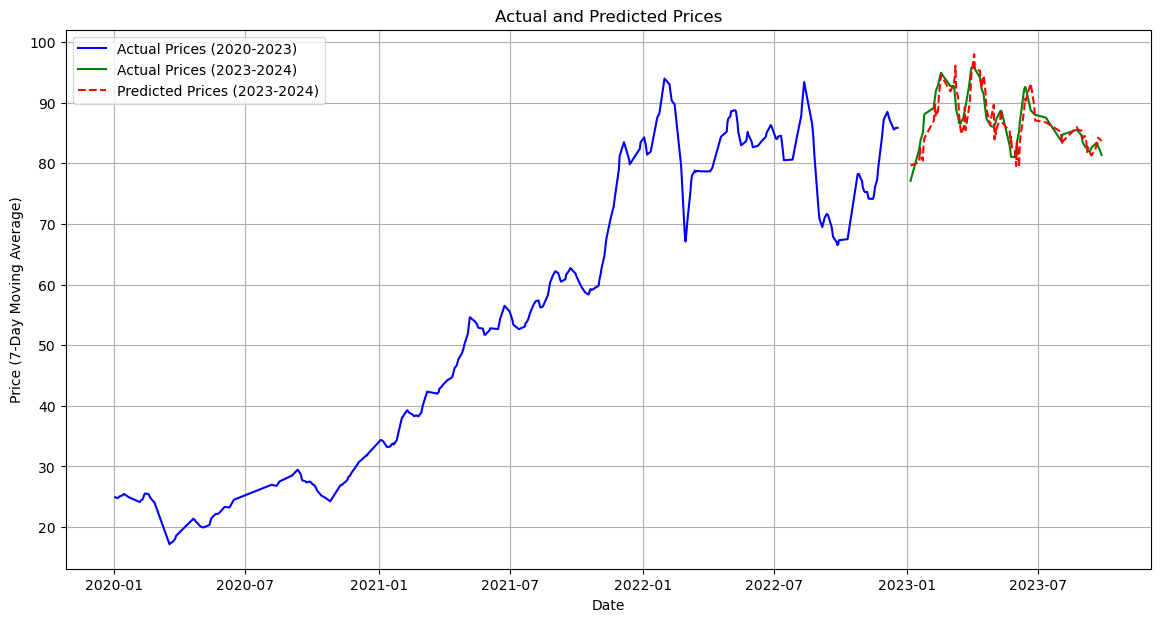

In [12]:
# Correct plotting logic with 80/20 split
plt.figure(figsize=(14, 7))

# Plot actual prices for the first 80% (training data)
plt.plot(merged_data['Date'][:len(y_train)], y_train, label='Actual Prices (2020-2023)', color='blue', linewidth=1.5)

# Plot actual prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_test, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the last 20% (test data)
plt.plot(merged_data['Date'][len(y_train):], y_pred, label='Predicted Prices (2023-2024)', color='red', linestyle='--', linewidth=1.5)

# Add title and labels
plt.title("Actual and Predicted Prices")
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50


C:\Users\gurde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 1.2272 - val_loss: 1.7542
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0459 - val_loss: 1.5198
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8899 - val_loss: 1.2905
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7492 - val_loss: 1.0722
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6352 - val_loss: 0.8672
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5112 - val_loss: 0.6784
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4071 - val_loss: 0.5110
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3009 - val_loss: 0.3684
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2199 - val_loss: 0.2529
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1541 - val_loss: 0.1653
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1120 - val_loss: 0.1045
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0754 - val_loss: 0.0637

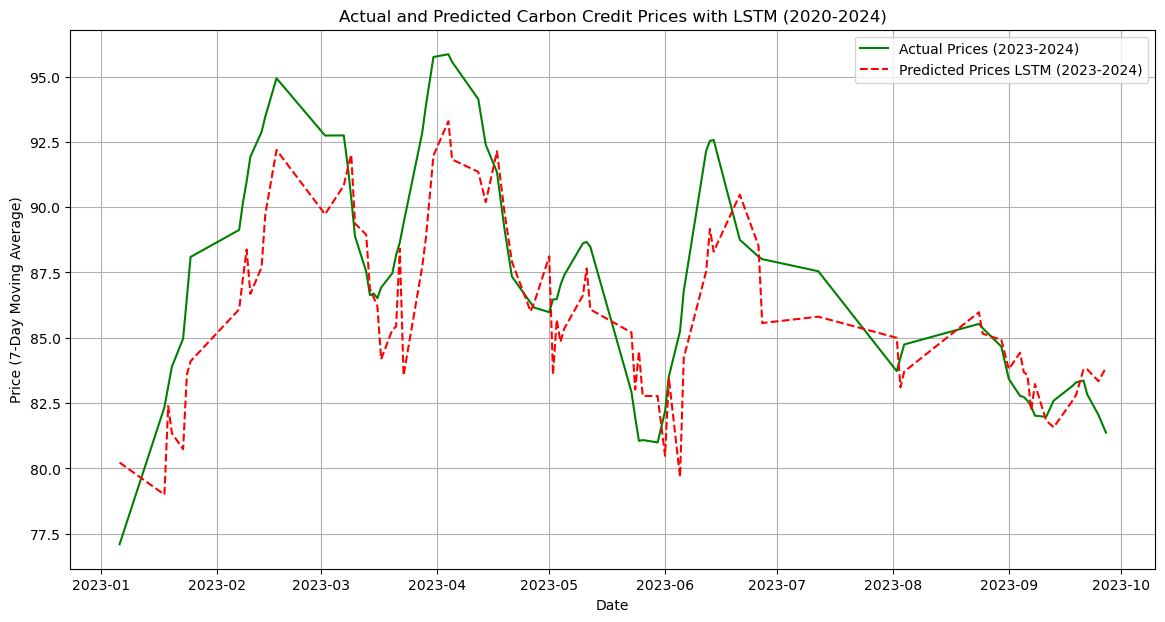

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape input to be [samples, time steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Scale the target (y) using a separate scaler
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layer with input shape
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))

# Add dropout layer for regularization
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_scaled), verbose=1, shuffle=False)

# Make predictions on the test set
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Inverse transform the predictions and actual test data
y_pred_lstm_inv = y_scaler.inverse_transform(y_pred_lstm)
y_test_inv = y_scaler.inverse_transform(y_test_scaled)

# Calculate MSE and R^2 score
mse_lstm = mean_squared_error(y_test_inv, y_pred_lstm_inv)
r2_lstm = r2_score(y_test_inv, y_pred_lstm_inv)

print(f"LSTM - Mean Squared Error: {mse_lstm:.2f}, R-squared: {r2_lstm:.2f}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))

# Plot actual prices for the test data
plt.plot(merged_data['Date'][len(y_train):], y_test_inv, label='Actual Prices (2023-2024)', color='green', linewidth=1.5)

# Plot predicted prices for the test data
plt.plot(merged_data['Date'][len(y_train):], y_pred_lstm_inv, label='Predicted Prices LSTM (2023-2024)', color='red', linestyle='--', linewidth=1.5)

plt.title('Actual and Predicted Carbon Credit Prices with LSTM (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (7-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()